# Exploración de archivos

In [1]:
from utils.cargar import df_caso

In [2]:
df = df_caso('adela')
df.head()

,user_id,team_id,gender,df,title,opt_left,opt_right,max_num,sel,comment,phase,time
id,,,,,,,,,,,,
20277,4014,NaN,F,1,hola,adios,hola,6,4,hola,1,2021-10-25T23:47:13.685Z
20278,4017,NaN,M,1,hola,adios,hola,6,6,No,1,2021-10-25T23:47:13.842Z
20279,4014,NaN,F,2,Tangananica Tanganana?,Tangananica,Tangaaná,7,1,hola,1,2021-10-25T23:47:15.103Z
20280,4017,NaN,M,2,Tangananica Tanganana?,Tangananica,Tangaaná,7,1,Si,1,2021-10-25T23:47:15.177Z
20281,4016,NaN,M,1,hola,adios,hola,6,6,NaN,1,2021-10-25T23:47:33.868Z


In [3]:
print(df['title'].unique()[0])
print('1\t'+df['opt_left'].unique()[0])
print(str(df['max_num'].unique()[0])+'\t'+df['opt_right'].unique()[0])

hola
1	adios
6	hola


In [4]:
print('Cantidad de valores nulos por columna:')
display(df.isna().sum())
print('Cantidad de valores únicos por columna:')
display(df.nunique())

Cantidad de valores nulos por columna:


user_id        0
team_id      904
gender         0
df             0
title          0
opt_left       0
opt_right      0
max_num        0
sel            0
comment       79
phase          0
time           0
dtype: int64

Cantidad de valores únicos por columna:


user_id       237
team_id       142
gender          3
df              2
title          32
opt_left        5
opt_right       4
max_num         2
sel             7
comment      1188
phase           7
time         1331
dtype: int64

In [5]:
df = df[df['comment'].notna()]
print("Cantidad de respuestas con texto: {}".format(len(df)))

Cantidad de respuestas con texto: 1252


## Exploración básica del texto

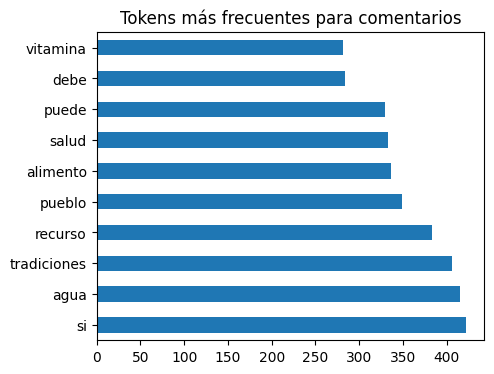

In [6]:
from utils.exploracion import plot_token_frequency, most_common
from nltk.corpus import stopwords

serie_tokens = most_common(df,'comment',ignore=stopwords.words('spanish'))
plot_token_frequency(serie_tokens,'Tokens más frecuentes para comentarios')

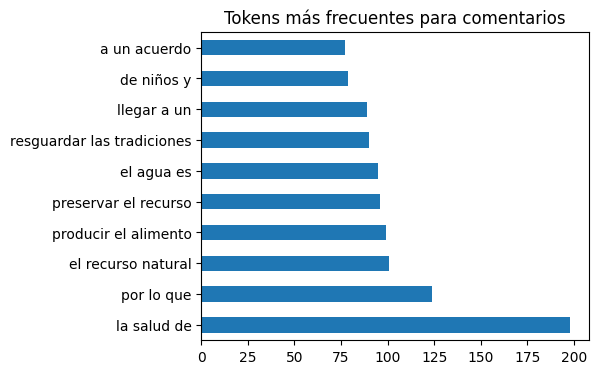

In [7]:
serie_tokens3 = most_common(df,'comment',ignore=stopwords.words('spanish'),n_grams=3)
plot_token_frequency(serie_tokens3,'Tokens más frecuentes para comentarios')

---

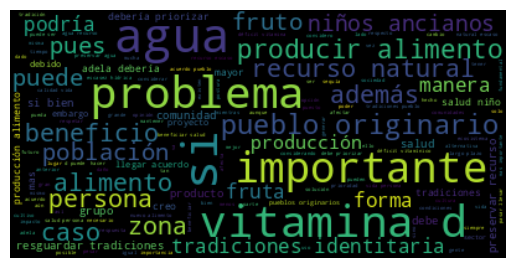

In [8]:
from utils.exploracion import wordcloud_from_column

wordcloud_from_column(df,'comment',ignore=stopwords.words('spanish'))